# **CS 620–Introduction to Data Science and Analytics, HW3**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
URL ='https://www.cs.odu.edu/~sampath/courses/data/iris.csv'
data_iris = pd.read_csv(URL,sep=',',encoding='UTF-8')
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **Question 1**
Download the iris data set from the link above. Please include this file in your
submission. Read iris.csv into Python as a pandas DataFrame. Note that the CSV file includes
column headers. Answer the following questions (print statements in your code) by computing the
results.


* How many data points are there in this data set?

  #### There are 5 datapoints in this dataset.


In [15]:
data_iris.to_csv('iris.csv', index=True)

In [16]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


* What are the data types of the columns?

  #### Id is int64, SepalLengthCm,SepalWidthCm,PetalLengthCm and PetalWidthCm is float64. Species is object type

In [17]:
data_iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

* What are the column names?

  #### The columns names are 'Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' and 'Species'.

In [18]:
data_iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

* How many species of flower are included in the data?

  #### There are 3 different types of species are included in data. They are 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'.

# **Question 2**
Use the Seaborn and Matplotlib to generate a scatter matrix plot (pair plot) for the four
features (petal width, petal length, sepal width, and sepal length). Each point in the scatter plot
should be colored according to its species. Include this plot file in your submission.



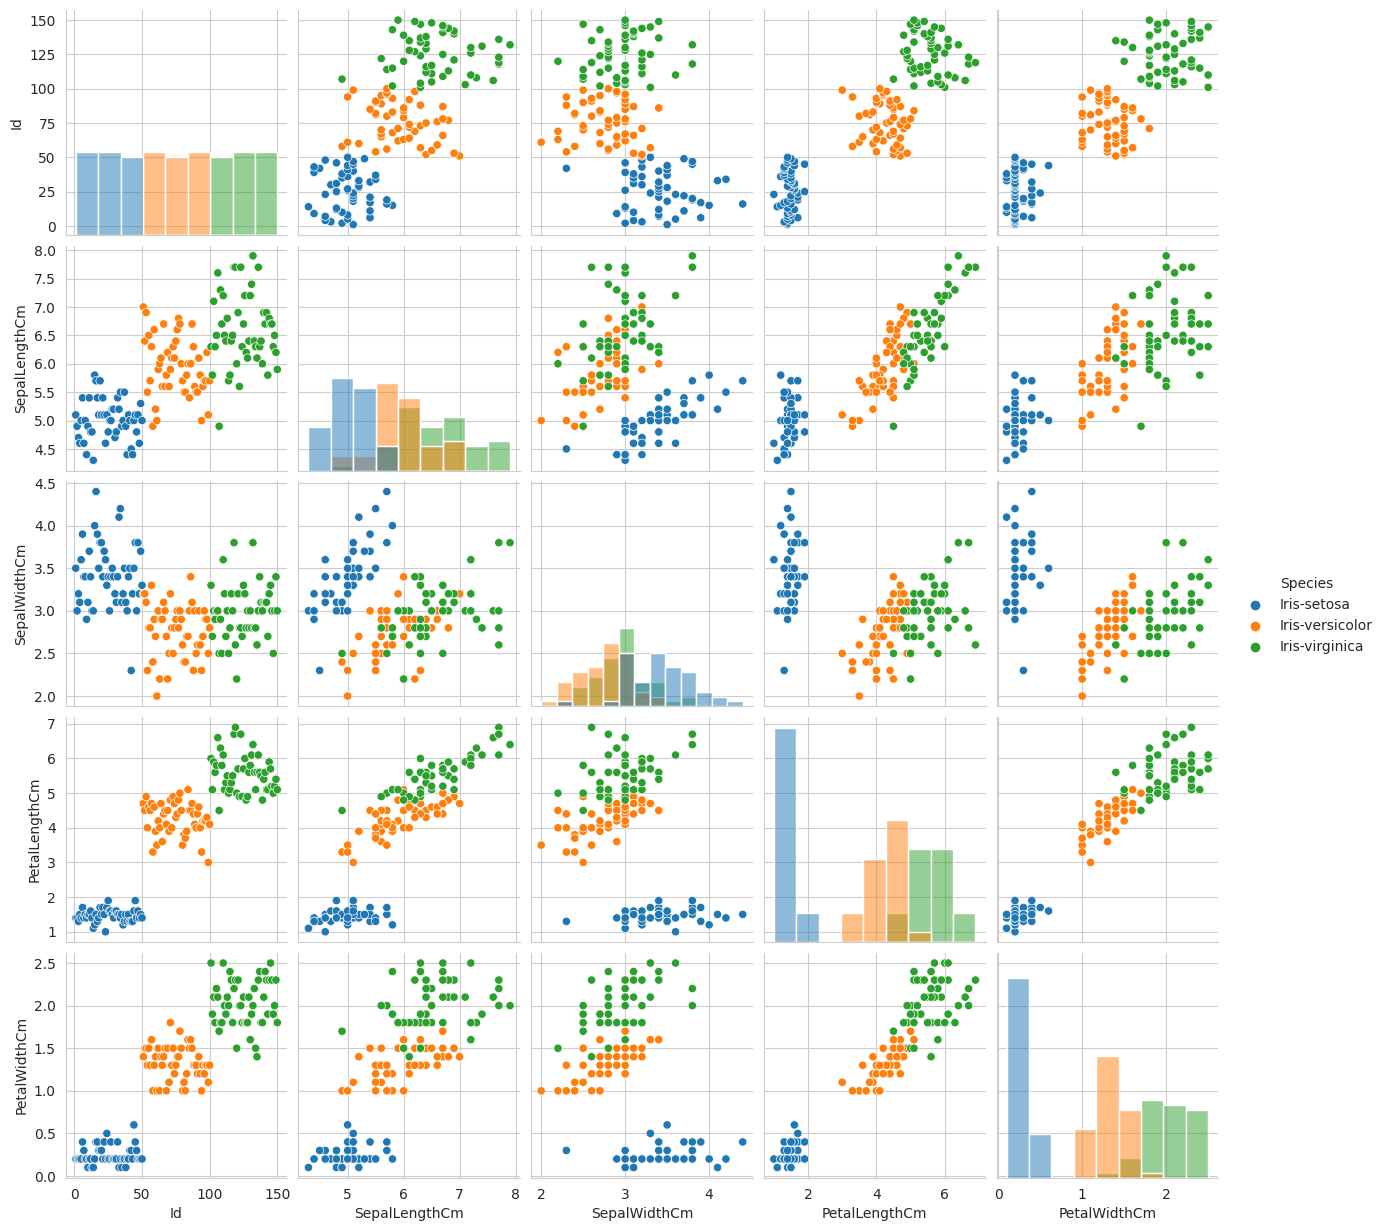

In [19]:
ax=sns.pairplot(data_iris, hue="Species",diag_kind="hist")
plt.savefig("SpeciesPairPlot.png")

# **Question 3**
The iris dataset is commonly used in machine learning as a proving ground for clustering
and classification algorithms. Some researchers have found it useful to use two additional
features, called Petal ratio and Sepal ratio, defined as the ratio of the petal length to petal width
and the ratio of the sepal length to sepal width, respectively. Add two columns to your DataFrame
corresponding to these two new features. Name these columns PetalRatio and SepalRatio,
respectively



In [20]:
data_iris['PetalRatio'] = data_iris['PetalLengthCm']/data_iris['PetalWidthCm']
data_iris['SepalRatio'] = data_iris['SepalLengthCm']/data_iris['SepalWidthCm']
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalRatio,SepalRatio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,7.0,1.457143
1,2,4.9,3.0,1.4,0.2,Iris-setosa,7.0,1.633333
2,3,4.7,3.2,1.3,0.2,Iris-setosa,6.5,1.468750
3,4,4.6,3.1,1.5,0.2,Iris-setosa,7.5,1.483871
4,5,5.0,3.6,1.4,0.2,Iris-setosa,7.0,1.388889


# **Question 4**
Save your extended iris DataFrame to a CSV file called iris_extended.csv. Please include
this file in your submission.

In [21]:
data_iris.to_csv('iris_extended.csv', index=True)

# **Question 5**
Use a pandas aggregate operation to determine the mean, standard deviation, minimum,
and maximum of the petal and sepal ratio for each of the three species in the data set. Note: you
should be able to get all of these numbers in a single table using a well-chosen group-by or
aggregate operation.

In [22]:
data_iris_by_species= data_iris.groupby('Species').agg({'PetalRatio': ['mean','std','min', 'max'],'SepalRatio': ['mean','std','min', 'max']})
data_iris_by_species.T

Species          Iris-setosa  Iris-versicolor  Iris-virginica
PetalRatio mean     7.078000         3.242837        2.780662
           std      3.123779         0.312456        0.407367
           min      2.666667         2.666667        2.125000
           max     15.000000         4.100000        4.000000
SepalRatio mean     1.474578         2.160402        2.230453
           std      0.118693         0.228658        0.246992
           min      1.268293         1.764706        1.823529
           max      1.956522         2.818182        2.961538

# **Question 6**
Use the Seaborn and Matplotlib to generate a plot
showing the distribution of petal ratio and sepal ratio for each of the three species. Your plot
should have two subplots, one for the petal ratio and one for the sepal ratio. You may choose the
details of your plots (i.e., how to handle outliers, displaying mean vs median, etc) however you
think is best. Please include labels on your x- and y-axes and give an appropriate title to your plot
and subplots.

<Axes: title={'center': 'Sepal ratio for each of the three species.'}, xlabel='SepalRatio', ylabel='Density'>

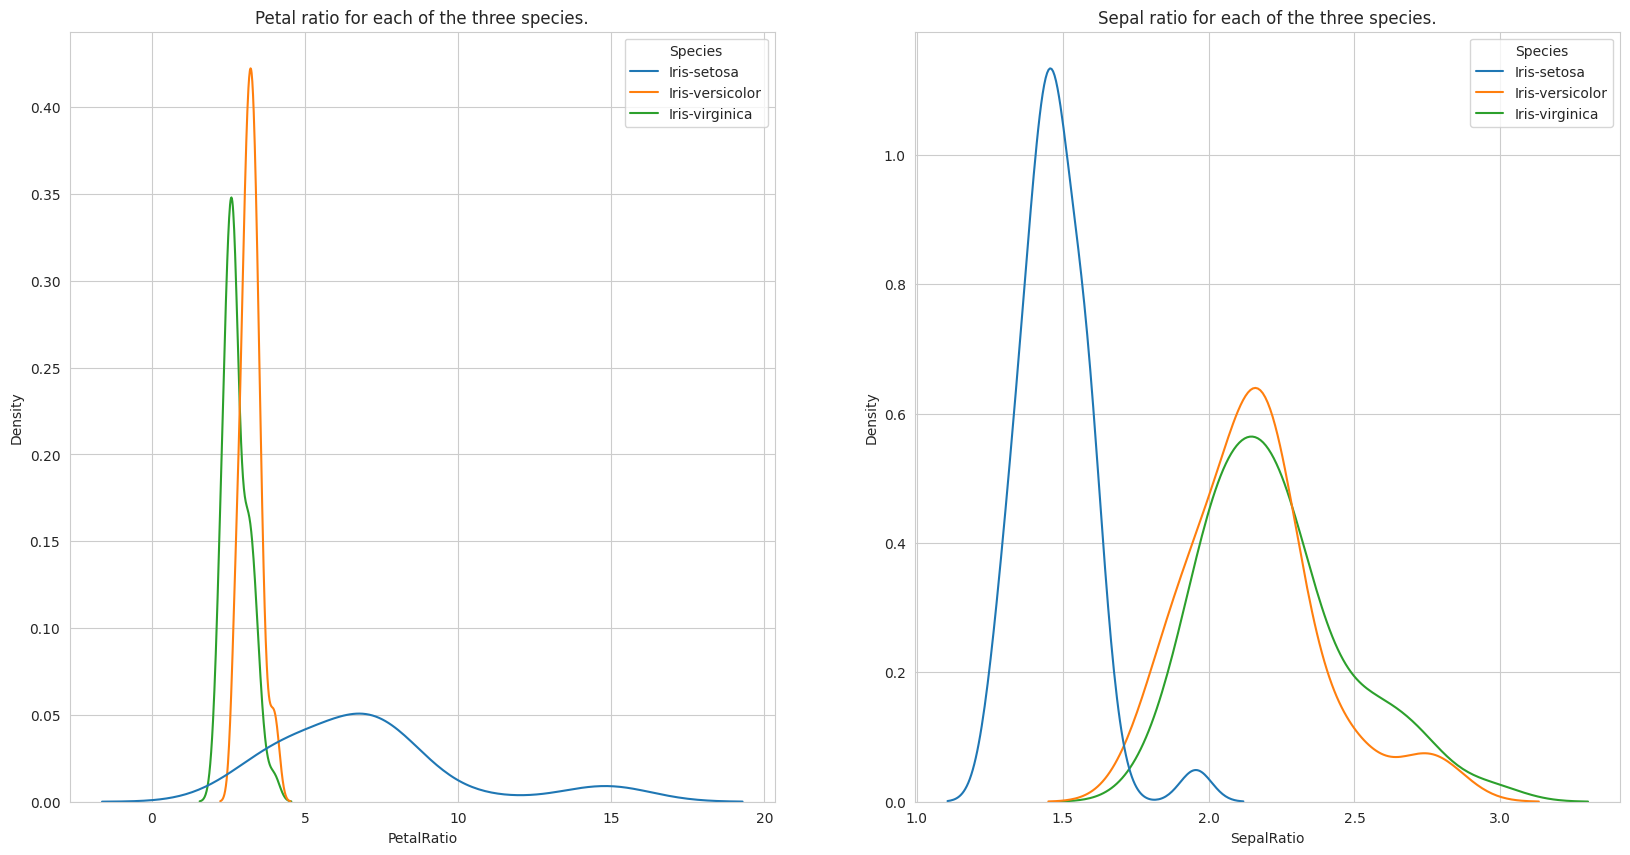

In [23]:
fig, ax1 = plt.subplots(1,2, sharex='col', figsize=(20,10))

# 1st plot
sns.set_style("whitegrid")
ax1[0].set_title("Petal ratio for each of the three species.")
ax1[1].set_title("Sepal ratio for each of the three species.")

sns.kdeplot(data=data_iris, x="PetalRatio", hue="Species", ax=ax1[0], legend='brief')
# 2nd plot
sns.kdeplot(data=data_iris, x="SepalRatio", hue="Species", ax=ax1[1], legend='brief')

In [24]:
plt.savefig("RatioBySpecies.png")

<Figure size 640x480 with 0 Axes>

In [25]:
%%capture
!pip install nbconvert
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [26]:
#Mouting the google drive path to read ipynb files
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [27]:
# https://saturncloud.io/blog/convert-google-colab-notebook-to-pdf-html/
!jupyter nbconvert '/content/drive/MyDrive/Colab Notebooks/Verma-hw3.ipynb' --to pdf

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Verma-hw3.ipynb to pdf
[NbConvertApp] Support files will be in Verma-hw3_files/
[NbConvertApp] Making directory ./Verma-hw3_files
[NbConvertApp] Making directory ./Verma-hw3_files
[NbConvertApp] Writing 38189 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 534732 bytes to /content/drive/MyDrive/Colab Notebooks/Verma-hw3.pdf
